In [1]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import itertools
import os
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,Activation,BatchNormalization
from sklearn import preprocessing

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50,VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img=cv2.imread('/content/drive/MyDrive/dataset/train/Happy/Training_10019449.jpg')

In [4]:
img.shape

(48, 48, 3)

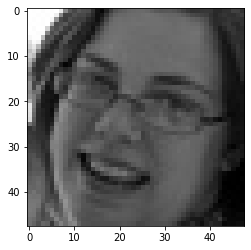

In [5]:
plt.imshow(img)

In [6]:
dir=('/content/drive/MyDrive/dataset/train/')

In [7]:
classes=["Happy","Sad"]

read all the img and convertin them to array

In [8]:
training_data=[]
img_size=224 
def create_training_data():
  for category in classes:
    path=os.path.join(dir,category)
    class_num=classes.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass 


In [9]:
create_training_data()

In [10]:
print(len(training_data))

4100


In [11]:
temp=np.array(training_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [12]:
temp.shape

(4100, 2)

In [13]:
import random
random.shuffle(training_data)

In [14]:
x=[] #feature/data
y=[] #label

for features,label in training_data:
  
  x.append(features)
  y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3) ##converting it to 4 dimensions  

In [15]:
x.shape

(4100, 224, 224, 3)

In [16]:
##we normalize the data before applying deep learning
x=x/255.0

In [17]:
print(x)

[[[[0.11764706 0.11764706 0.11764706]
   [0.11764706 0.11764706 0.11764706]
   [0.12156863 0.12156863 0.12156863]
   ...
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]]

  [[0.11764706 0.11764706 0.11764706]
   [0.11764706 0.11764706 0.11764706]
   [0.12156863 0.12156863 0.12156863]
   ...
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]]

  [[0.11764706 0.11764706 0.11764706]
   [0.11764706 0.11764706 0.11764706]
   [0.12156863 0.12156863 0.12156863]
   ...
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]
   [0.21960784 0.21960784 0.21960784]]

  ...

  [[0.01568627 0.01568627 0.01568627]
   [0.01568627 0.01568627 0.01568627]
   [0.01568627 0.01568627 0.01568627]
   ...
   [0.01568627 0.01568627 0.01568627]
   [0.01568627 0.01568627 0.01568627]
   [0.01568627 0.01568627 0.01568627]]

  [[0.01568627 0.01568627 0.01568627]
   [0.0

In [18]:
y=np.array(y)

In [19]:
y.shape

(4100,)

In [20]:
y[800]

0

In [21]:
y[1]

0

In [22]:
##I'm not in the case of on hot encoding (the classes are numbers)
##if on hot encoding:
##1:0000001
##2:0000010
##3:0000100 ......

In [23]:
model=tf.keras.applications.MobileNetV2()##pretrainedModel

In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

create my model/ new input and output

In [25]:
base_input =model.layers[0].input
##take the input of the model

In [26]:
base_output=model.layers[-2].output
##take the layer before the final layer in the model (remoce the output layer of the model)

In [27]:
##add our output layer
from tensorflow.keras import layers
final_output=layers.Dense(128)(base_output)##adding new layer after the output of glooble pooling layer
final_ouput=layers.Activation('relu')(final_output)##activation function
final_output=layers.Dense(64)(final_ouput)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(2,activation='softmax')(final_ouput)##my nbre of classes is 2 ##uwe use softmax because this is the classification layer

In [28]:
final_output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [31]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam" ,metrics=["accuracy"])
##The output variables if represented as integers, then you need to use SparseCategoricalCrossentropy. If you use the output as a one hot encoding vector then you can use CategoricalCrossentropy()

In [32]:
new_model.fit(x,y,epochs=30)

Epoch 1/30
129/129 [==============================] - 43s 203ms/step - loss: 0.3767 - accuracy: 0.8251
Epoch 2/30
129/129 [==============================] - 26s 201ms/step - loss: 0.2488 - accuracy: 0.8998
Epoch 3/30
129/129 [==============================] - 26s 203ms/step - loss: 0.1830 - accuracy: 0.9254
Epoch 4/30
129/129 [==============================] - 26s 204ms/step - loss: 0.1344 - accuracy: 0.9507
Epoch 5/30
129/129 [==============================] - 27s 207ms/step - loss: 0.1453 - accuracy: 0.9393
Epoch 6/30
129/129 [==============================] - 27s 207ms/step - loss: 0.1103 - accuracy: 0.9583
Epoch 7/30
129/129 [==============================] - 27s 208ms/step - loss: 0.1105 - accuracy: 0.9578
Epoch 8/30
129/129 [==============================] - 27s 209ms/step - loss: 0.0889 - accuracy: 0.9644
Epoch 9/30
129/129 [==============================] - 27s 209ms/step - loss: 0.0860 - accuracy: 0.9724
Epoch 10/30
129/129 [==============================] - 27s 210ms/step - l

In [33]:
# now we calculate the accuracy on the test data.

new_model.save("my_model.h5")

In [34]:
def Emotion(a):
  if(a==0):
    print("Happy")
  else:
     print("Sad")
     


In [35]:
Emotion(0)

Happy


In [36]:
img1=cv2.imread('/content/drive/MyDrive/dataset/test/happy.jpg')

In [37]:
img1.shape

(1390, 1300, 3)

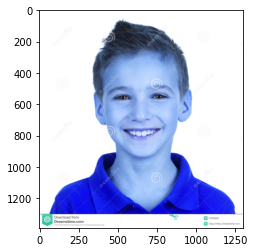

In [38]:
plt.imshow(img1)

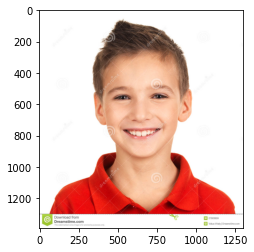

In [39]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_RGB2BGR))

In [40]:
##we need face detection algorithme (gray img)
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [41]:
gray=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)

In [42]:
gray.shape

(1390, 1300)

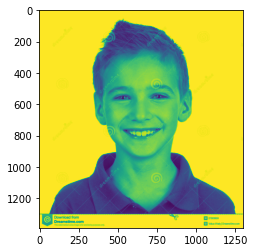

In [43]:
plt.imshow(gray)

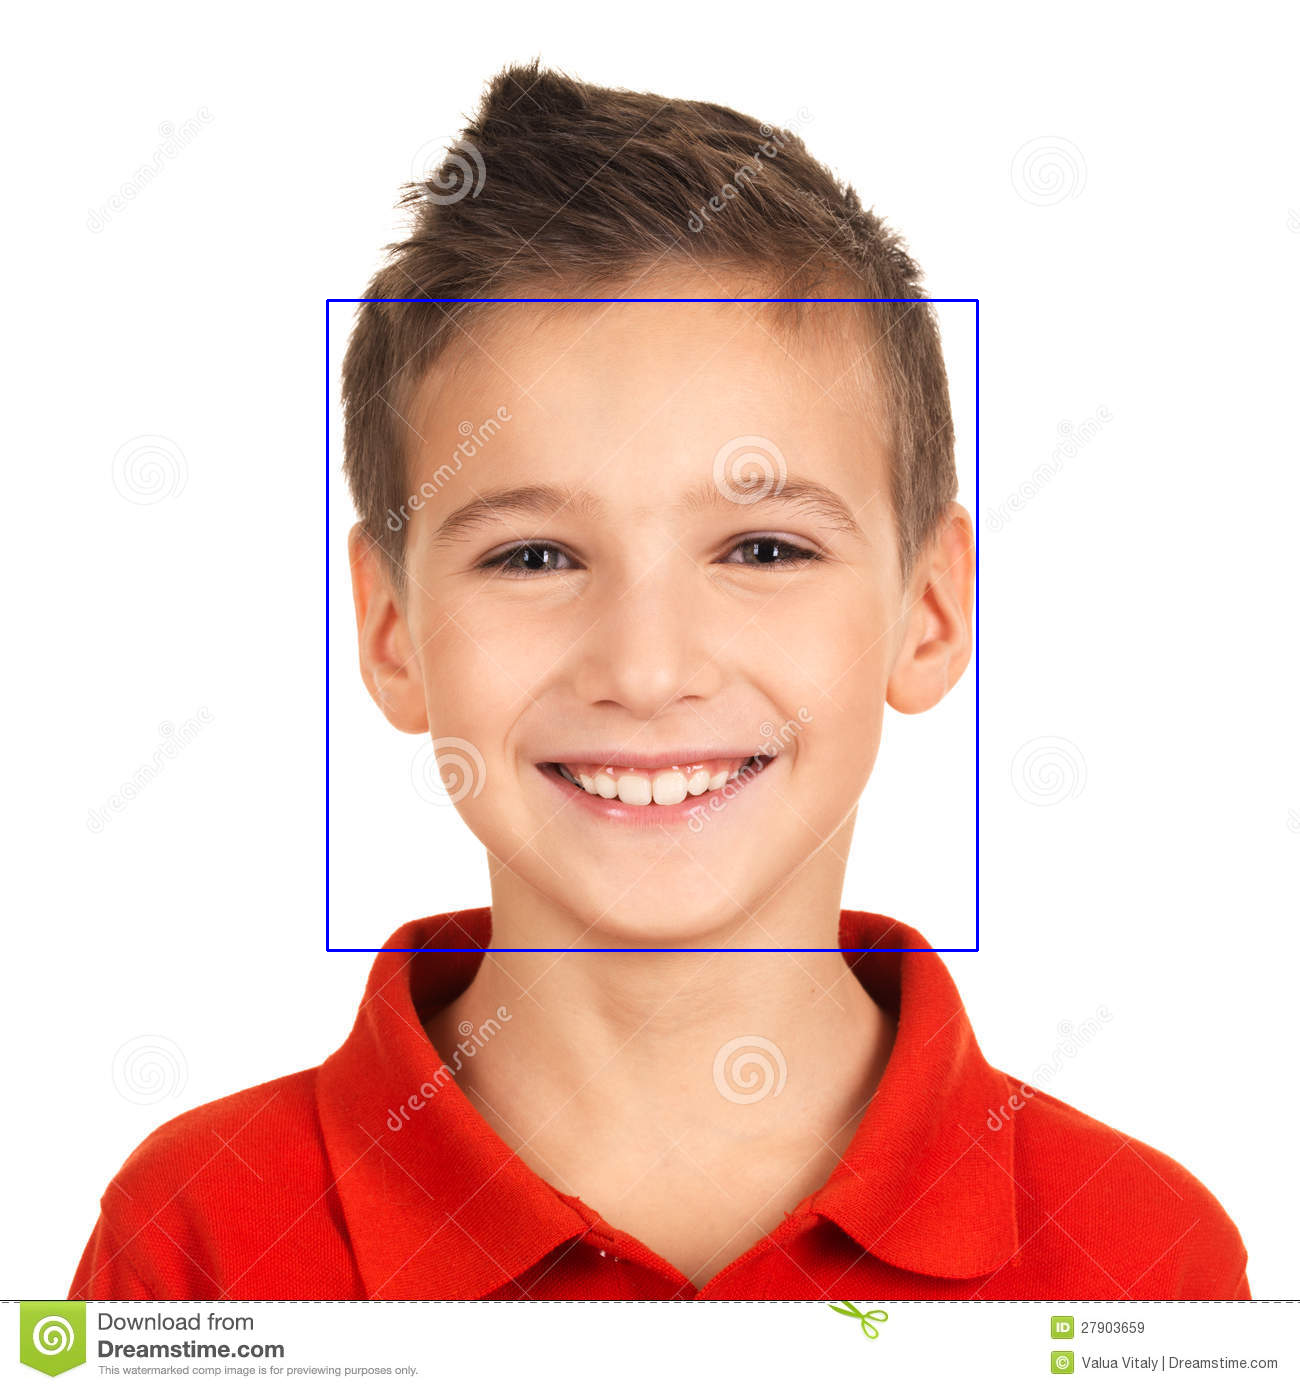

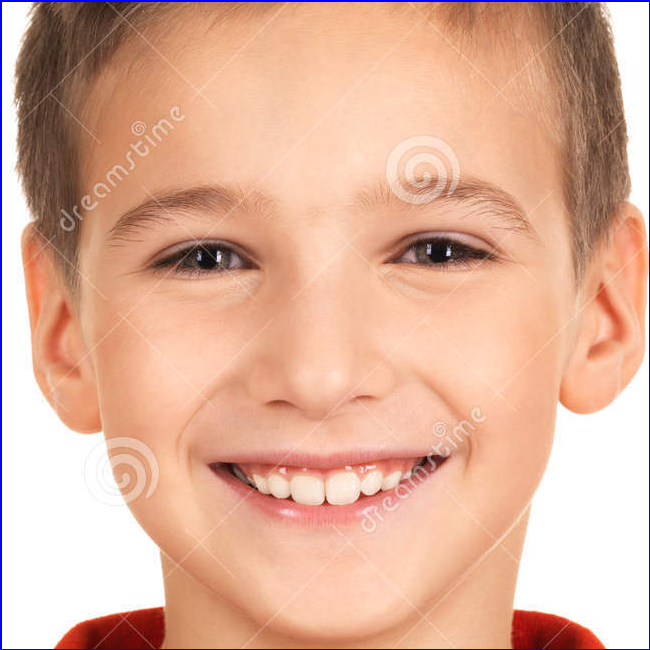

-1

In [44]:
# Detect faces
from google.colab.patches import cv2_imshow
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_color=img1[y:y+h,x:x+w]
# Display the output
cv2_imshow(img1)
cv2_imshow(roi_color)
cv2.waitKey()
# faces=faceCascade.detectMultiScale(gray,1.1,4)
# print(faces)
# for x,y,w,h in faces:
#   roi_gray=gray[y:y+h,x:x+w]
#   print(roi_gray)
#   print("fffffffffffffffffff--------------------------------")
#   roi_color=img1[y:y+h,x:x+w]
#   print(roi_color)
#   cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
#   facess=faceCascade.detectMultiScale(roi_gray)
#   print(facess)
#   # if len(facess)==0:
#   #   print("face not detected")
#   # else :
#   for (ex,ey,ew,eh) in facess:
#       print("a")
#       cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
   ##   face_roi= roi_color[ey:ey+eh,ex:ex+ew]  

In [45]:
f_img=cv2.resize(roi_color,(224,224))##
f_img=np.expand_dims(f_img,axis=0)##need fourth dimension
f_img=f_img/255.0 ##normalization


In [46]:
pred=new_model.predict(f_img)

In [47]:
pred[0]

array([9.9999905e-01, 1.0036515e-06], dtype=float32)

In [48]:
np.argmax(pred)

0

In [49]:
Emotion(np.argmax(pred))

Happy


In [104]:
img2=cv2.imread('/content/drive/MyDrive/dataset/test/sad3.jpg')

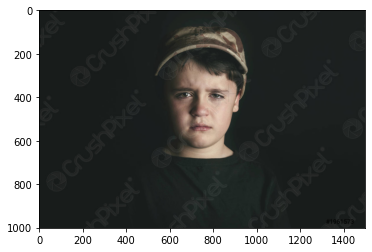

In [105]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_RGB2BGR))

In [106]:
gray2=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

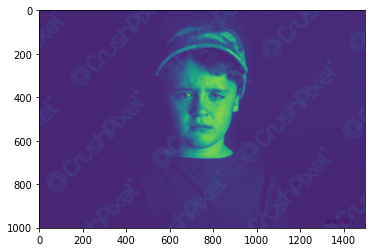

In [107]:
plt.imshow(gray2)

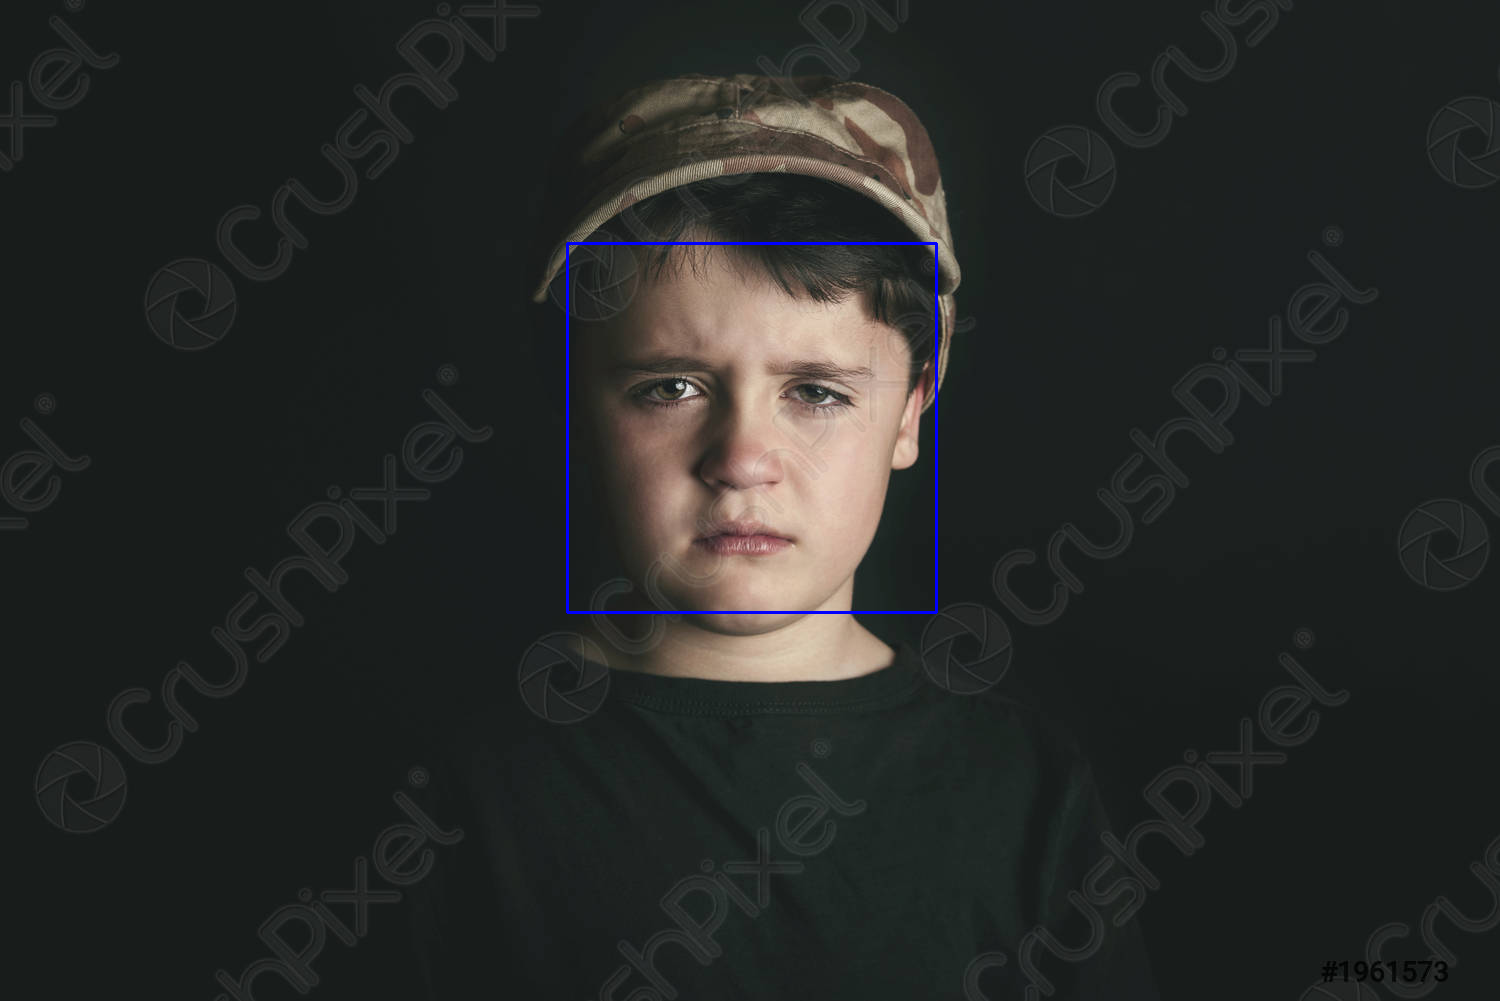

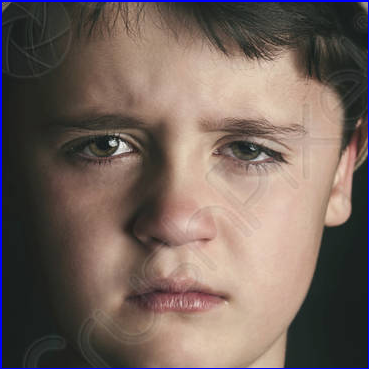

-1

In [108]:
faces = faceCascade.detectMultiScale(gray2, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_color2=img2[y:y+h,x:x+w]
# Display the output
cv2_imshow(img2)
cv2_imshow(roi_color2)
cv2.waitKey()

In [109]:
f_img2=cv2.resize(roi_color2,(224,224))##
f_img2=np.expand_dims(f_img2,axis=0)##need fourth dimension
f_img2=f_img2/255.0 ##normalization

In [110]:
pred2=new_model.predict(f_img2)

In [111]:
pred2[0]

array([1.813722e-05, 9.999819e-01], dtype=float32)

In [112]:
np.argmax(pred2)

1

In [113]:
Emotion(np.argmax(pred2))

Sad


In [129]:
img3=cv2.imread('/content/drive/MyDrive/dataset/test/happyg.jpg')

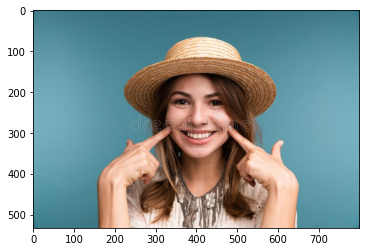

In [130]:
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_RGB2BGR))

In [131]:
gray3=cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)

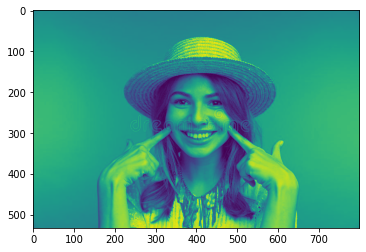

In [132]:
plt.imshow(gray3)

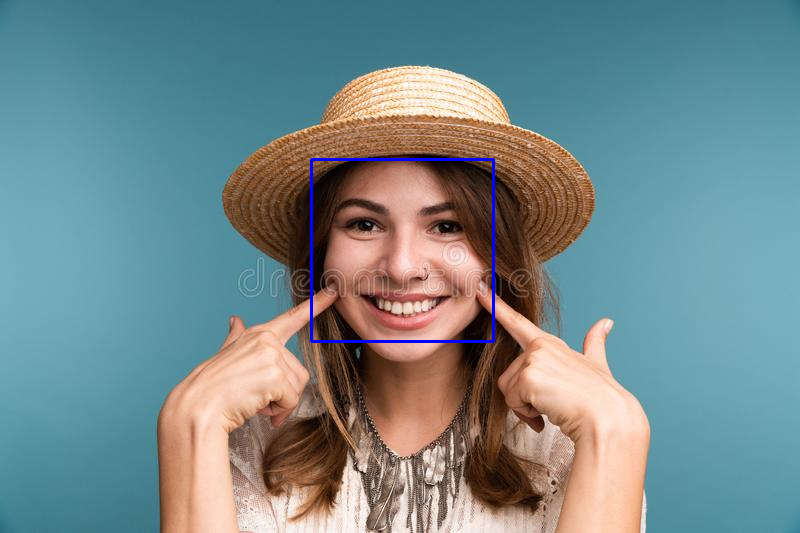

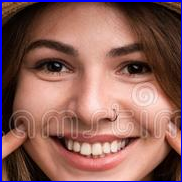

-1

In [133]:
faces = faceCascade.detectMultiScale(gray3, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img3, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_color3=img3[y:y+h,x:x+w]
# Display the output
cv2_imshow(img3)
cv2_imshow(roi_color3)
cv2.waitKey()

In [134]:
f_img3=cv2.resize(roi_color3,(224,224))##
f_img3=np.expand_dims(f_img3,axis=0)##need fourth dimension
f_img3=f_img3/255.0 ##normalization

In [135]:
pred3=new_model.predict(f_img3)

In [136]:
pred3[0]

array([9.9999475e-01, 5.2329506e-06], dtype=float32)

In [137]:
np.argmax(pred3)

0

In [138]:
Emotion(np.argmax(pred3))

Happy
